In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

In [3]:
# creating our model.
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [4]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


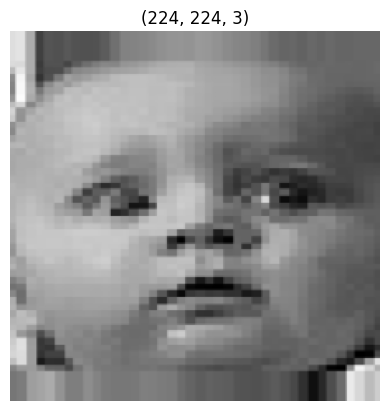

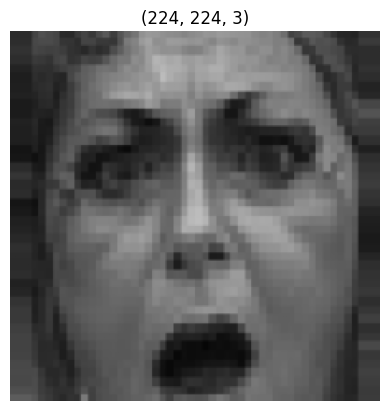

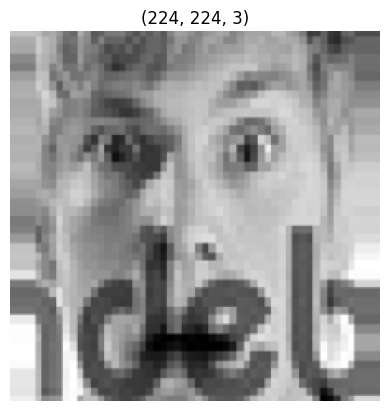

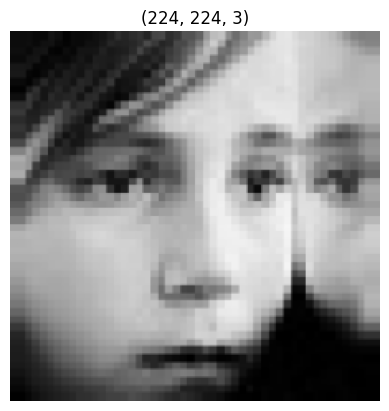

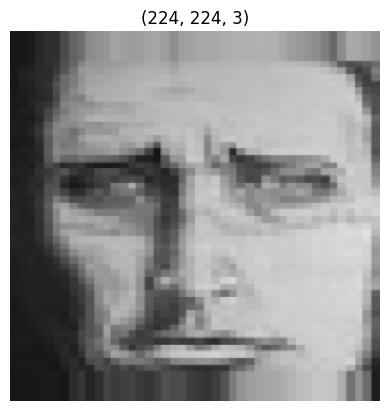

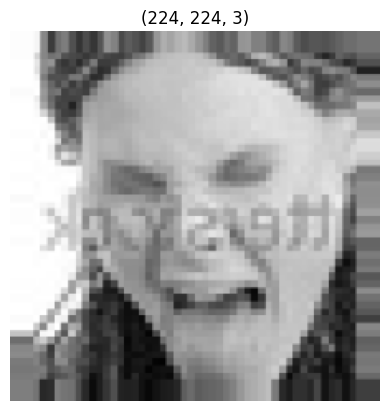

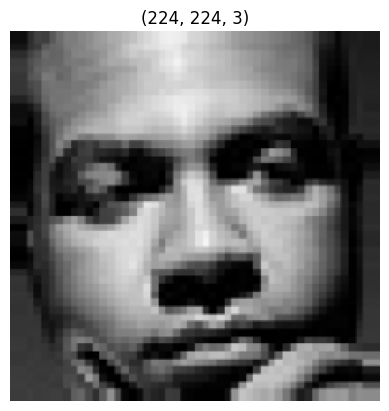

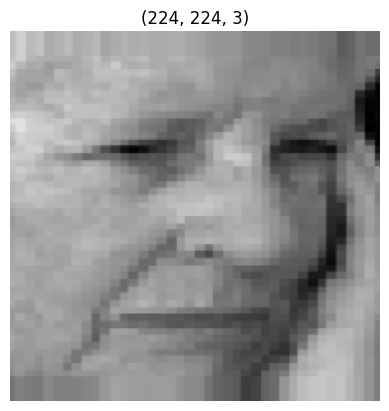

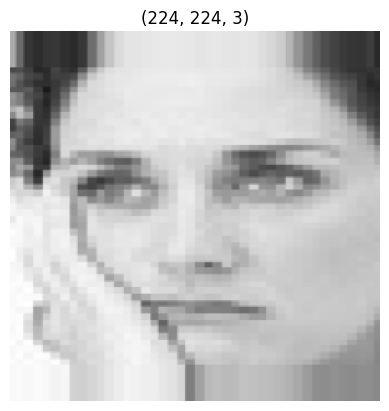

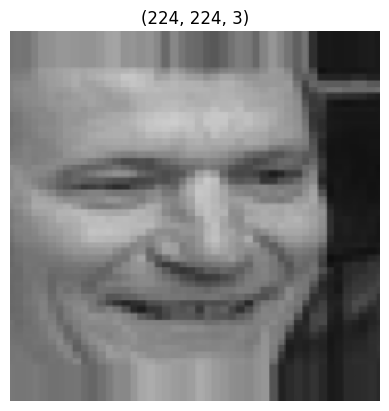

In [6]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will plot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [7]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 20, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [8]:
hist = model.fit(train_data, 
                steps_per_epoch=100,
                epochs= 80, 
                validation_data= val_data, 
                validation_steps= 8,
                callbacks=[es,mc])

Epoch 1/80
100/100 [==============================] - ETA: 0s - loss: 6.7855 - accuracy: 0.3887
Epoch 1: val_accuracy improved from -inf to 0.45312, saving model to best_model.h5
100/100 [==============================] - 72s 706ms/step - loss: 6.7855 - accuracy: 0.3887 - val_loss: 4.7404 - val_accuracy: 0.4531


c:\Users\Pratham Kashyap\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/80
100/100 [==============================] - ETA: 0s - loss: 5.8148 - accuracy: 0.4338
Epoch 2: val_accuracy did not improve from 0.45312
100/100 [==============================] - 67s 665ms/step - loss: 5.8148 - accuracy: 0.4338 - val_loss: 6.5025 - val_accuracy: 0.3750
Epoch 3/80
100/100 [==============================] - ETA: 0s - loss: 5.8227 - accuracy: 0.4668
Epoch 3: val_accuracy improved from 0.45312 to 0.45703, saving model to best_model.h5
100/100 [==============================] - 68s 674ms/step - loss: 5.8227 - accuracy: 0.4668 - val_loss: 6.0259 - val_accuracy: 0.4570
Epoch 4/80
100/100 [==============================] - ETA: 0s - loss: 6.3617 - accuracy: 0.4625
Epoch 4: val_accuracy did not improve from 0.45703
100/100 [==============================] - 74s 741ms/step - loss: 6.3617 - accuracy: 0.4625 - val_loss: 7.8696 - val_accuracy: 0.4297
Epoch 5/80
100/100 [==============================] - ETA: 0s - loss: 6.1559 - accuracy: 0.4972
Epoch 5: val_accuracy did 

In [9]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [10]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

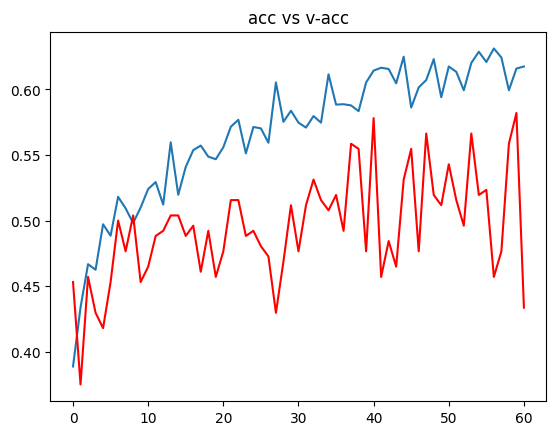

In [11]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

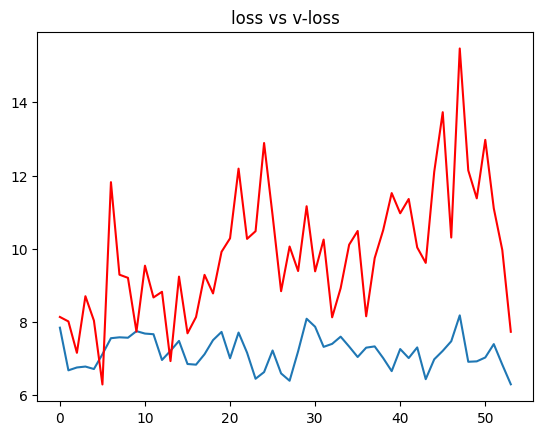

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 60ms/step
 the image is of happy


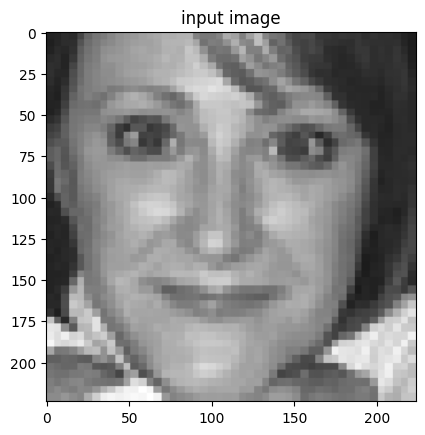

In [ ]:
# path for the image to see if it predics correct class

path = "test\happy\PrivateTest_2390435.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()